#### **(1) 데이터 합치기**

In [1]:
import pandas as pd 
ios = pd.read_csv('ios_review.csv')
ios['리뷰'] = ios['리뷰'] + ' ' + ios['제목'] 
ios.drop(['Unnamed: 0','제목'], inplace=True, axis=1)
ios['날짜'] = ios['날짜'].apply(lambda x : str(x)[:10])


In [2]:
import pandas as pd 
play = pd.read_csv('playstore_review.csv')
play.drop('Unnamed: 0', inplace=True, axis=1)
play['날짜'] = play['날짜'].apply(lambda x : str(x)[:10])


In [3]:
i = ios[['날짜','리뷰','별점']] 
p = play[['날짜','리뷰','별점']]
review = pd.concat([i,p])

In [4]:
review.reset_index(inplace=True) 
review.drop(['index'], inplace=True, axis=1)

In [5]:
review

,날짜,리뷰,별점
0,2022-05-07,도서관 다닐 때 카드 안들고 다녀서 좋아요 위젯 생기면 더 편해질 것 같아요 ios...,5
1,2022-04-04,소소한 할인쿠폰도 많이 주는것같고 \n서울시 공공시설 이용할때 하나로 쓸수 있어서 ...,5
2,2022-03-29,아래에 저 같은 분이 계시던데 저두 문자로 인증하려구 하니 쿠키 제한에 걸려 본인 ...,1
3,2022-03-12,"통신사를 선택하면 PASS선탹하는 버튼이 사라지고 문자인증만 남고, 인증문자도 한...",1
4,2022-02-25,Ios 업데이트 하면서 또 안되네요 \n개발자 누굽니까 1점도 아깝다,1
...,...,...,...
164,2017-12-11,사용처가 아직...,3
165,2018-01-01,본인인증 확인 안됨. 뭘 어쩌라고?,1
166,2017-12-14,앞으로 더 많은 시설에서 사용할 수 있으면 좋겠습니다.,5
167,2017-12-11,완전 기대합니다,5


#### **(2) 전처리**

In [6]:
review['날짜']  = pd.to_datetime(review['날짜'])
review['연도'] = review['날짜'].dt.year
review['월'] = review['날짜'].dt.month 
review['요일'] = review['날짜'].dt.dayofweek

In [7]:
review.head(2)

,날짜,리뷰,별점,연도,월,요일
0,2022-05-07,도서관 다닐 때 카드 안들고 다녀서 좋아요 위젯 생기면 더 편해질 것 같아요 ios...,5,2022,5,5
1,2022-04-04,소소한 할인쿠폰도 많이 주는것같고 \n서울시 공공시설 이용할때 하나로 쓸수 있어서 ...,5,2022,4,0


In [8]:
review['리뷰'] = review['리뷰'].apply(lambda x : x.replace("\n"," "))

In [9]:
pip install git+https://github.com/ssut/py-hanspell.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-wiqmu8ka
  Running command git clone -q https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-wiqmu8ka


In [10]:
from hanspell import spell_checker
review['리뷰'] = review['리뷰'].apply(lambda x : spell_checker.check(x))
review['리뷰'] = review['리뷰'].apply(lambda x : x.checked)

In [11]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:3 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists...
Reading package lists...
Building dependency tree...
Rea

In [12]:
# JAVA_HOME 환경변수 설정하기

%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [13]:
from konlpy.tag import Okt
import re
okt=Okt()

In [14]:
stopwords = ['하다','하고','있다','언제','은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','을','에서','거','좀','요',
 '한','도','카드','서울','서울시민','서울시민카드','앱','어플리케이션','애플리케이션','ㅠㅠ','시민', '서울 시민','에','만','안','ㅋ','ㅋㅋ','ㅎㅎ','도서관','인증'] 

 # 도서관, 인증 단어는 리뷰에서 다수 등장하는 언어로 토픽모델링을 위해 불용어 처리 

In [15]:
#전처리 함수 만들기
def preprocessing(review, okt, remove_stopwords = True, stop_words =stopwords):

  # 1. 한글 및 공백 제외한 문자 모두 제거
  review_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]','',review)
  
  #2. okt 객체를 활용하여 명사 단어로 나눔 
  word_review = okt.nouns(review_text)

  if remove_stopwords:
    #3. 불용어 제거(선택)
    word_review = [token for token in word_review if not token in stop_words]
  return word_review

In [16]:
review['token'] = review['리뷰'].apply(lambda x : preprocessing(x, okt))

In [17]:
# sentiment 
review['sentiment'] = 3
for i in range(len(review)) : 
  if review['별점'][i] <= 3 : 
    review['sentiment'][i] = 0 # 부정 
  
  else : 
    review['sentiment'][i] = 1 # 긍정 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


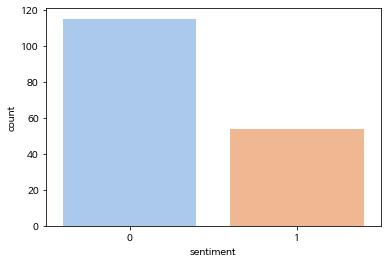

In [18]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
ax = sns.countplot(x='sentiment',data=review, palette='pastel') # 부정 리뷰가 2배 더 많음 

#### **(3) 리뷰 빈도 발생 날짜 분석**

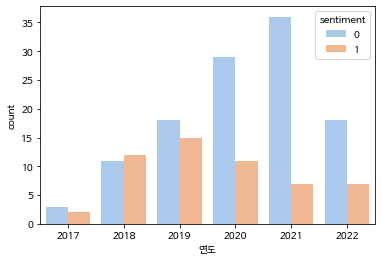

In [ ]:
ax = sns.countplot(x='연도',data=review, palette='pastel',hue='sentiment') # 2022 년은 상반기 리뷰만 존재 

# 0 : 부정

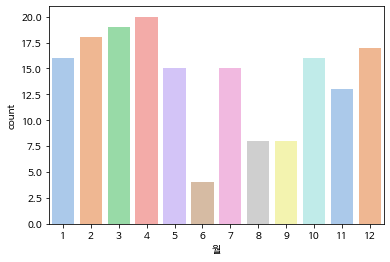

In [ ]:
ax = sns.countplot(x='월',data=review, palette='pastel')

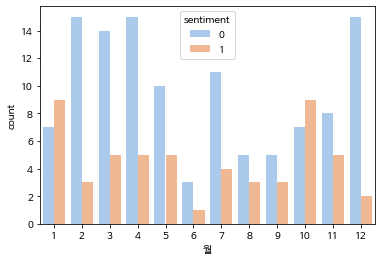

In [ ]:
ax = sns.countplot(x='월',data=review, palette='pastel',hue='sentiment')

In [ ]:
review.요일.value_counts() # 0: '월요일', 6 : '일요일'

1    30
4    27
0    25
3    25
2    23
6    21
5    18
Name: 요일, dtype: int64

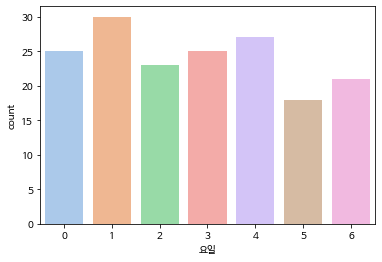

In [ ]:
ax = sns.countplot(x='요일',data=review, palette='pastel')

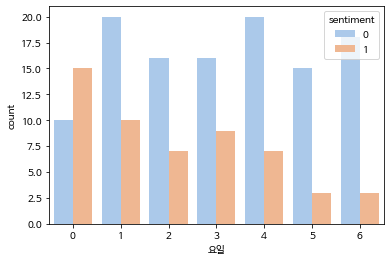

In [ ]:
ax = sns.countplot(x='요일',data=review, palette='pastel',hue='sentiment')

In [ ]:
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

#### **(4) 토픽모델링**

In [20]:
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [77]:
processed_data=[]
for i in range(len(review)):
  if len(review['token'][i]) > 0 : 
    processed_data.append(review['token'][i])

In [78]:
dictionary = corpora.Dictionary(processed_data)

2022-06-19 06:20:48,267 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2022-06-19 06:20:48,272 : INFO : built Dictionary<557 unique tokens: ['더', '때', '생기', '위젯', '공공시설']...> from 159 documents (total 1499 corpus positions)
2022-06-19 06:20:48,275 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<557 unique tokens: ['더', '때', '생기', '위젯', '공공시설']...> from 159 documents (total 1499 corpus positions)", 'datetime': '2022-06-19T06:20:48.275614', 'gensim': '4.2.0', 'python': '3.7.13 (default, Apr 24 2022, 01:04:09) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic', 'event': 'created'}


In [79]:
dictionary.filter_extremes(no_above=0.5)

# 전체의 50%로 이상 차지하는 단어는 제외

2022-06-19 06:20:48,719 : INFO : discarding 485 tokens: [('더', 3), ('생기', 2), ('위젯', 2), ('공공시설', 2), ('쿠폰', 4), ('당장', 1), ('분', 1), ('아래', 3), ('얼른', 2), ('유저', 1)]...
2022-06-19 06:20:48,724 : INFO : keeping 72 tokens which were in no less than 5 and no more than 79 (=50.0%) documents
2022-06-19 06:20:48,728 : INFO : resulting dictionary: Dictionary<72 unique tokens: ['때', '사용', '서울시', '이용', '하나로']...>


In [80]:
corpus = [dictionary.doc2bow(text) for text in processed_data]

**🔹 최적의 토픽 갯수 찾기**

* Coherence : 토픽이 얼마나 의미론적으로 일관성 있는지 판단
* 값이 높을수록 의미론적 일관성이 높음 

In [ ]:
pip install --upgrade gensim

In [ ]:
pip install pyLDAvis

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
import pickle
import pyLDAvis
import pyLDAvis.gensim_models
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [ ]:
coherence_values = [] 
for i in range(2,6) : 
  ldamodel = LdaModel(corpus, num_topics=i, id2word = dictionary) 
  coherence_model_lda = CoherenceModel(model = ldamodel, texts = processed_data, dictionary = dictionary)
  coherence_lda = coherence_model_lda.get_coherence()
  coherence_values.append(coherence_lda)

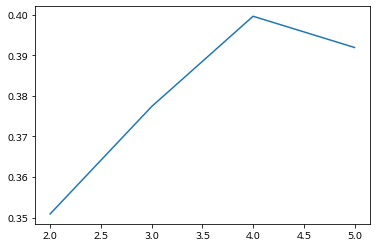

In [98]:
import matplotlib.pyplot as plt
x = range(2,6)
plt.plot(x,coherence_values) 
plt.show()

In [99]:
num_topics = 4
chunksize = 2000
passes = 20
iterations = 400
eval_every = None

temp = dictionary[0]
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

2022-06-19 06:55:39,763 : INFO : using autotuned alpha, starting with [0.25, 0.25, 0.25, 0.25]
2022-06-19 06:55:39,769 : INFO : using serial LDA version on this node
2022-06-19 06:55:39,772 : INFO : running online (multi-pass) LDA training, 4 topics, 20 passes over the supplied corpus of 159 documents, updating model once every 159 documents, evaluating perplexity every 0 documents, iterating 400x with a convergence threshold of 0.001000
2022-06-19 06:55:39,774 : INFO : PROGRESS: pass 0, at document #159/159
2022-06-19 06:55:39,941 : INFO : optimized alpha [0.22146621, 0.23319998, 0.2161105, 0.18880957]
2022-06-19 06:55:39,950 : INFO : topic #0 (0.221): 0.064*"회원" + 0.056*"가입" + 0.041*"문자" + 0.040*"후" + 0.040*"확인" + 0.040*"이용" + 0.032*"정" + 0.029*"어플" + 0.029*"통합" + 0.029*"세션"
2022-06-19 06:55:39,959 : INFO : topic #1 (0.233): 0.075*"본인" + 0.052*"계속" + 0.047*"연동" + 0.042*"입력" + 0.038*"가입" + 0.033*"문자" + 0.029*"쿠키" + 0.029*"확인" + 0.029*"접속" + 0.028*"하나요"
2022-06-19 06:55:39,963 : INFO :

In [100]:
top_topics = model.top_topics(corpus)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

# 1.본인 확인 인증 문자 오류 
# 2. 접속/업데이트 오류
# 3. 회원 가입 오류

Average topic coherence: -12.4644.
[([(0.09930646, '가입'),
   (0.082650386, '회원'),
   (0.055445332, '후'),
   (0.037385046, '정'),
   (0.0373832, '통합'),
   (0.032852795, '다시'),
   (0.032526, '신청'),
   (0.031760007, '버튼'),
   (0.029645765, '어플'),
   (0.028253926, '선택'),
   (0.028098028, '세션'),
   (0.023631647, '정말'),
   (0.023615614, '값'),
   (0.023421116, '문제'),
   (0.021187924, '확인'),
   (0.020424454, '이용'),
   (0.019906914, '등록'),
   (0.019575562, '다른'),
   (0.019258128, '삭제'),
   (0.01922553, '다음')],
  -10.410178063585356),
 ([(0.10448076, '발급'),
   (0.097771645, '이용'),
   (0.05926003, '시설'),
   (0.054080706, '어플'),
   (0.043910105, '서울시'),
   (0.03986935, '가입'),
   (0.0369646, '뭐'),
   (0.03182997, '하나로'),
   (0.031763565, '추가'),
   (0.031062499, '모든'),
   (0.030557554, '중'),
   (0.025801733, '통합'),
   (0.025797484, '내'),
   (0.025796473, '수정'),
   (0.02578979, '메시지'),
   (0.02161887, '오류'),
   (0.01956553, '문제'),
   (0.01939497, '연동'),
   (0.018982079, '문자'),
   (0.017938849, '때')],


In [101]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.167443 -0.134294       1        1  33.868854
0      0.109831 -0.084650       2        1  30.324939
2      0.145812  0.026158       3        1  21.826846
3     -0.088200  0.192786       4        1  13.979361, topic_info=   Term       Freq      Total Category  logprob  loglift
1    사용  15.000000  15.000000  Default  30.0000  30.0000
17   발급  16.000000  16.000000  Default  29.0000  29.0000
8    본인  22.000000  22.000000  Default  28.0000  28.0000
36   회원  17.000000  17.000000  Default  27.0000  27.0000
3    이용  19.000000  19.000000  Default  26.0000  26.0000
..  ...        ...        ...      ...      ...      ...
3    이용   0.956434  19.719233   Topic4  -4.5887  -1.0585
4   하나로   0.213513   5.353262   Topic4  -6.0882  -1.2542
69   정말   0.218537   5.517236   Topic4  -6.0650  -1.2611
10  아이폰   0.268354   7.321401   Topic4  -5.8596  -1.3387
6    개선   0.239821   6.373787   Topic4  -5.9720  -1.3125

[162 rows x 6 columns], token_table=      Topic      Freq Term
term                      
29        1  0.070380   가입
29        2  0.703802   가입
29        3  0.211141   가입
48        2  0.779999    값
48        3  0.156000    값
...     ...       ...  ...
21        2  0.311642   해도
24        1  0.744533   확인
24        2  0.229087   확인
36        2  0.969134   회원
37        2  0.917234    후

[161 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 4])

In [102]:
for i in range(len(review)) : 
  if '본인' in review['token'][i] : 
    print(i, review['리뷰'][i])

2 아래에 저 같은 분이 계시던데 저도 문자로 인증하려고 하니 쿠키 제한에 걸려 본인 문자 인증이 안됩니다.  당장 앱 카드를 쓸 수가 없어요 얼른 개선 부탁드립니다.  아이폰 유저입니다 쿠키 제한이 걸려서 문자 인증이 안돼요
3 통신사를 선택하면  PASS 선택하는 버튼이 사라지고 문자 인증만 남고, 인증 문자도 한 번에 안 와서 겨우 받으면 세션 만료 쿠키 제한되어 있다며 본인인증이 안됩니다. 아이폰 13인데요
5 아이폰입니다. 본인인증 절차에서 핸드폰 문자 인증을 입력하면 화면이 까매지면서 진행이 안됩니다. 혹시나 해서 어플 재설치해도 안돼요. 발급을 진행 못하니 어플이 무용지물이네요…. 본인인증이 안돼서 카드 발급 불가능
7 pass 어플도 안되고 문자 확인도 안되고 아이핀까지 안돼요. 본인인증만 수십 번 시도했는데 절대 안 넘어가죠요. 본인 확인에서 안 넘어가요
8 아이폰입니다 휴대폰 본인인증이 계속 에러 납니다 브라우저 설정 다시 하라는데 변경하라는데 왜ㅜ그러는지요?! ㅠㅠ 본인인증 실퍠가 계속됩니다
10 본인확인 실패만 계속 뜨네요 가입이 안되는데요
11 본인인증 화면에서 모두 입력하고 나면 쿠키 설정 관련 오류가 계속 납니다. 본인인증이 안됩니다
13 세션 만료 쿠키 제한 풀기? 이거 pass 어 플로 안 넘어가더니 계속 떠서 문자로 본인확인하는 걸로 바꿔서 하니 되긴 한데 업데이트 좀 해주세요 3월부터 피드백 받으신 거 같던데 본인인증이 안돼요
23 본인인증 절차에서  세션 값이 유효하지 않다고 뜨고 다음 단계로 넘어갈 수 없습니다. 세션 값이 유효하지 않음
26 도서관 앱 이용하려고 가입하려는데 본인인증 모든 수단 휴대폰과 아이핀 인증 다 안 됩니다. 20번 시도했는데 다 안됩니다. 화가 나서 이용할 수가 없네요. 쿠키 허용되어 있는데도 쿠키 차단 허용하라고 메시지 뜨고 보안 문자 제대로 입력했는데도 어플이 구려서 인식도 못 하네요. 몇 개월 전부터 제기돼왔던 문제 같은데 세금으로 이런 어플 만들어놓고 제대로 운영도 안 하는 서울시 어이가 없

In [103]:
for i in range(len(review)) : 
  if '가입' in review['token'][i] : 
    print(i, review['리뷰'][i])

9 도서관 카드 추가하려고 정회원 가입 요청할 때 처음에는 정회원 인증이 안된다고 나오더니 그 후부터는 계속 유효하지 않은 주민등록 번호라고 나와요 어플을 삭제 후에 다시 깔아도 이 모양이네요 해결 좀 해주세요 계속 정회원 인증 실패
10 본인확인 실패만 계속 뜨네요 가입이 안되는데요
14 가입 인증도 안되고, 별점 1점도 아까움 서울시에서 어플 만들어 놓고 방치하는 듯 인증 오류
15 오늘 서울시민 카드 발급받고 노원구 도서관 통합 회원 카드 정회원 가입 신청하려는데 모든 조건 충족해서 버튼이 빨갛게 떴는데도 다음 창으로 안 넘어갑니다. 전혀 버튼이 아닌 것처럼 상호 작용을 안 해요 노원구립 도서관 통합회원증 정회원 가입 신청 버튼 안 눌림
16 가입하기를 누르고 인증 절차를 위해 휴대폰 인증하기를 통해 받은 문자의 번호까지 입력하고 나면 그냥 까만색이 떠요. 그것도 연속 3번을요!  인증부터 안되는데 다른 기능은 얼마나 험난할지.. 찾고로 ios 사용하고 있습니다. 저는 가입 절차에서 인증조차 못했습니다
18 회원가입부터 안되네요 ㅠㅠ 아이고 내 세금 ㅠㅠ 구려요
20 설치하자마자 에러 발생으로 가입도 안됩니다. 해결 부탁드립니다. 에러 발생
21 발급하기 버튼부터 계속 처리 중 오류가 발생하였다고 뜨면서 인식되지 않습니다. 회원가입
22 pass에서 세션 값이 유효하지 않다는 메시지만 뜨고 회원가입이 되지 않습니다. 여러 번 삭제하고 다시 다운로드하고 하기를 수십 번입니다. 기존 리뷰에 이런 문제들이 있던데 대응이 이상합니다. 확인된가 없으니 나이스로 연락하라니요!? 리뷰가 여러 개면 문제가 있단 것인데 이것에 대해 개발자님께서는 너무 수수방관하고 계신 거 아닌가요!? 확인 후에 수정 부탁드립니다. 세션 종료 회원가입 불가
24 가입하려는데 문자 인증이 안돼요 세션 값이 유효하지 않는다는 문구만 뜹니다 가입을 못하니 이용을 할 수가 없네요 가입하려는데 문자 인증이 안돼요
26 도서관 앱 이용하려고 가입하려는데 본인인증 모든 수단 휴대폰과 아이핀 인증 다 

In [104]:
for i in range(len(review)) : 
  if '발급' in review['token'][i] : 
    print(i, review['리뷰'][i])

5 아이폰입니다. 본인인증 절차에서 핸드폰 문자 인증을 입력하면 화면이 까매지면서 진행이 안됩니다. 혹시나 해서 어플 재설치해도 안돼요. 발급을 진행 못하니 어플이 무용지물이네요…. 본인인증이 안돼서 카드 발급 불가능
15 오늘 서울시민 카드 발급받고 노원구 도서관 통합 회원 카드 정회원 가입 신청하려는데 모든 조건 충족해서 버튼이 빨갛게 떴는데도 다음 창으로 안 넘어갑니다. 전혀 버튼이 아닌 것처럼 상호 작용을 안 해요 노원구립 도서관 통합회원증 정회원 가입 신청 버튼 안 눌림
19 서울시민 카드 발급하기 버튼을 누르면 “처리 중 에러가 발생하였습니다”라고만 뜨고 진행이 안돼요 발급하기
21 발급하기 버튼부터 계속 처리 중 오류가 발생하였다고 뜨면서 인식되지 않습니다. 회원가입
25 카드 발급을 하려 하면 문자 인증 부분에서 세션 값이 유효하지 않는다는 메시지가 뜨고 문자 인증을 받을 수가 없습니다.  에러 좀 수정해 주세요 인증이 되지 않아요
27 도서관 카드 발급하려고 시민 카드 앱 설치 시민 카드 발급받았는데 광진구 도서관 발급 시 비번을 영문 숫자 특수기호 8자 이상 진짜 조합을 30번은 확인하면서 입력했는데 계속 영문 숫자 특수기호 입력하라고 나오네요 ㅜㅜ 도대체 뭘 어쩌라는 건지... 시민 카드도 똑같이 해서 잘 등록됐는데요.  오류인지 확인 부탁드립니다. 도서관 카드 발급
46 서울시민 카드 발급 인증 안돼요 인증 허시겠습니까 예 눌러도 아무 반응이 없네요 서울시민 카드 발급 인증 안됩니다
55 도서관 카드 발급하고 가지고 다니기 힘들어 불편했는데 안 가지고 다닐 수 있어서 편하네요. 관공서에서 만든 앱이라 별로 기대 안 했는데.. 은근 쓸모.. 계속 개선해주세요 ^^
60 통합 시설 카드를 추가하려고 하면 시스템 간의 연계 문제로 불가능하다는 메시지가 뜨면서 발급이 안 됩니다
65 카드 발급하려는데 본인인증 문자가 안 와요.. 지금까지 다른 앱들로 잘만 해왔고 스팸메일에도 없고 카톡에도 없고 skt pass 인증도 안되고 뭐... 답답하네요 진

In [105]:
for i in range(len(review)) : 
  if '사용' in review['token'][i] : 
    print(i, review['리뷰'][i])

1 소소한 할인쿠폰도 많이 주는 것 같고  서울시 공공시설 이용할 때 하나로 쓸 수 있어서 좋은 것 같아요 사용하기 편리해요
16 가입하기를 누르고 인증 절차를 위해 휴대폰 인증하기를 통해 받은 문자의 번호까지 입력하고 나면 그냥 까만색이 떠요. 그것도 연속 3번을요!  인증부터 안되는데 다른 기능은 얼마나 험난할지.. 찾고로 ios 사용하고 있습니다. 저는 가입 절차에서 인증조차 못했습니다
41 ios 13.4 업그레이드되고 앱 크러시 나면서 동작 안 한 지가 2주가 넘는데 대응 안 하나요? 세금으로 운영하는 건데 납세자 시민의 사용 불편에 신속히 대응 바랍니다 ios 13.4 앱 크러시 대응
44 도서관 카드, 문화 체육센터 카드 연동하여 꾸준히 잘 사용하던 시민입니다. 금일 갑자기 블루투스 연결하라는 팝업이 뜨면서부터 어플 진입이 불가하네요. 닫기 버튼을 누르면 네트워크 연결을 재확인하라는 알림 후 앱 종료되는 오류 발생합니다. 도서 수령하러 갔다가 불편을 겪었네요.. 빠른 확인 부탁드려요.. 진입 오류
53 잘 쓰고 있습니다! 공공기관뿐만 아니라 서울시에 있는 일반 상점들도 등록해서 사용하는 건 어떨까요? 프랜차이즈는 각자 앱이 있지만 작은 가게는 앱이 없는데요. 있어도 그거 하나 때문에 따로 설치하기도 번거롭고요. 요새 모바일 신분증도 나온다는데 정말 지갑 없이 다니고 싶어요! ㅎㅎ
72 버스에서 홍보영상 보고 설치했는데 쓰임새가 많을 것 같네요 사용하다 불편한 점 있으면 문의하겠습니다.
81 도서관 접속이 안됩니다. "이 사이트에서는 오래된 보안 설정이 사용되므로 개인 정보를 이 사이트에 발송할 경우 정보가 유출될 수 있음"으로 떠요.
91 안되네요 무작정 만들어서 사용 가능하다고 홍보하지 말고 될 수 있게 만든 다음 홍보하세요 어플 삭제합니다
101 도서관 카드를 사용하려 하는데 대기 중만 뜨고 사용해보니 회원정보가 없다는데 어떻게 해야 하나요?
117 잘 사용하겠습니다^^
119 잘 사용하고 있습니다~!
130 서울 시민으로서 긍지를 가지고 사용